In [1]:
# Machine learning and NLP libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
import scipy as sp
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import csv
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import wordcloud
import re

### Loading Data

In [2]:
# Load the cleaned data
df = pd.read_csv('../enron_emails_cleaned.csv')

In [3]:
# Get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463903 entries, 0 to 463902
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date        463903 non-null  object
 1   From        463903 non-null  object
 2   To          463903 non-null  object
 3   Subject     463903 non-null  object
 4   X-From      463903 non-null  object
 5   X-To        463903 non-null  object
 6   X-Folder    463903 non-null  object
 7   Folder      463903 non-null  object
 8   X-Origin    463903 non-null  object
 9   X-Filename  463903 non-null  object
 10  Content     463903 non-null  object
 11  Employee    463903 non-null  object
 12  Year        463903 non-null  int64 
 13  Month       463903 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 49.6+ MB


In [4]:
# Check for missing values
df.isnull().sum()

Date          0
From          0
To            0
Subject       0
X-From        0
X-To          0
X-Folder      0
Folder        0
X-Origin      0
X-Filename    0
Content       0
Employee      0
Year          0
Month         0
dtype: int64

In [11]:
# Show random samples of the data
df.sample(5)

,Date,From,To,Subject,X-From,X-To,X-Folder,Folder,X-Origin,X-Filename,Content,Employee,Year,Month
76254,2001-04-27 19:40:00+00:00,chris.germany@enron.com,germanj@basf-corp.com,Hye,Chris Germany,germanj,"\ExMerge - Germany, Chris\'Sent Mail",'sent mail,GERMANY-C,chris germany 6-25-02.pst,guess i won't need you tonight. my woman and i...,germany-c,2001,4
430881,2001-03-07 09:25:00+00:00,sherri.sera@enron.com,"kenneth.lay@enron.com, cliff.baxter@enron.com,...",Personal Use of Corporate Aircraft,Sherri Sera,Kenneth Lay Cliff Baxter Richard Causey James ...,\Steven_Kean_June2001_2\Notes Folders\Archivin...,untitled,KEAN-S,skean.nsf,please see the attached memo from jeff and ken.,kean-s,2001,3
353068,2000-11-27 12:30:00+00:00,mark.whitt@enron.com,"arvel.martin@enron.com, audrey.o'neil@enron.co...",Wildhorse/Tom Brown Acquisition,Mark Whitt,Arvel Martin Audrey O Neil Becky Caudle Christ...,\Gerald_Nemec_Dec2000_June2001_1\Notes Folders...,all documents,NEMEC-G,gnemec.nsf,i spoke with bob mustard of tom brown today an...,nemec-g,2000,11
4579,2001-06-05 15:00:00+00:00,taylor@enron.com,"john.sherriff@enron.com, london.brown@enron.co...",Whalley's Budget Meetings - June 5,Taylor Liz,Sherriff John,\jlavora\Inbox,inbox,Lavorado-J,jlavora.pst,reminder: whalley's budget meeting today @ 11:...,lavorato-j,2001,6
383490,2001-04-10 00:46:00+00:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/10/01; HourAhead hour: 1; <CODE...,Schedule Crawler,pete davis,\eric linder 6-28-02\Notes Folders\Discussion ...,discussion threads,LINDER-E,eric linder 6-28-02.nsf,start date: 4/10/01; hourahead hour: 1; no anc...,linder-e,2001,4


In [12]:
stopwords = nltk.corpus.stopwords.words('english')  # Load the list of stopwords from NLTK library
newstopwords = ['Re', 'FW', 'Fwd', 'EOL', 'E', 'mail', 'PLEASE', 'Ahead']   # Add more stopwords specific to the emails
for i in newstopwords:  # Add the new stopwords to the list
    stopwords.append(i)

### Word Cloud

A word cloud is a visual representation of word frequency, where more frequent words appear larger and bolder.

#### Visualize the most common words in the `subject` columns

' '.join(): The .join() function combines all elements of the df['Subject'].values (which is a list of subject strings) into one long string with each subject separated by a space (' ').

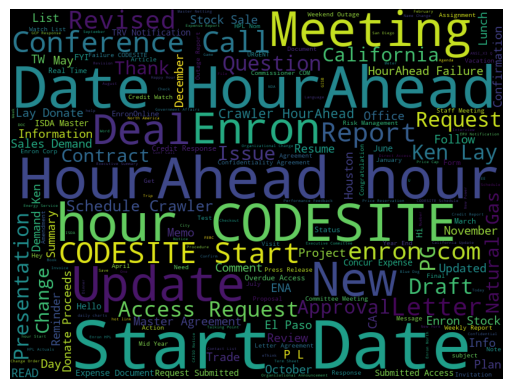

In [13]:
subjects = ' '.join(df['Subject'].values)   # Join all the `subjects` values store in dataframe into one string
fig, ax = plt.subplots()    # Create a figure and a set of subplots
wc = wordcloud.WordCloud(width = 800, height = 600, max_words = 200, stopwords = stopwords).generate(subjects)  # Create a word cloud object, stopwords are removed
ax.imshow(wc)
# This line turns off the axes around the word cloud. Removing the axes makes the visualization cleaner and more focused on the word cloud itself.
plt.axis('off')
plt.show()

#### Visualize the most common words in `content` columns

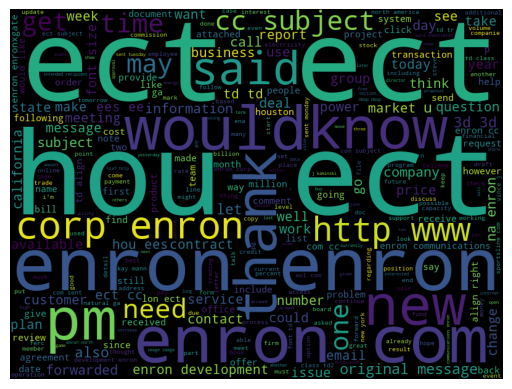

In [14]:
content = ' '.join(df['Content'].sample(5000).values) # Join all the `content` values store in dataframe into one string
fig, ax = plt.subplots()
wc = wordcloud.WordCloud(width = 800, height = 600, max_words = 300, stopwords = stopwords).generate(content)
ax.imshow(wc)
plt.axis('off')
plt.show()

Download packages

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/liqi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/liqi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


### NLP

In [18]:
# Initialize a lemmatizer
lemmatizer = WordNetLemmatizer()

In [19]:
# Tokenizing and lemmatizing the text to prepare for classification and sentiment analysis
text = []
for msg in df['Content'].values:
    msg_tokens = word_tokenize(msg) # splits the msg string into individual words, or tokens
    msg_tokens = [token.lower() for token in msg_tokens if token.isalpha()] # Convert tokens to lowercase and keep only alphabetic words
    msg_tokens = [word for word in msg_tokens if not word in stopwords] # Remove stopwords
    msg_tokens = [lemmatizer.lemmatize(word) for word in msg_tokens]    # Lemmatize the tokens
    
    text.append(msg_tokens)

In [20]:
# Join the tokens back together
text = [' '.join(message) for message in text]

In [23]:
# vectorizing the data using Tfidfvectorizer
vectorizer = TfidfVectorizer(min_df = 5, max_features = 5000, stop_words = stopwords, norm = 'l1')
data = vectorizer.fit_transform(text)

c:\Users\AN HONG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ahead', 'eol', 'fw', 'fwd', 'please'] not in stop_words.
  warnings.warn(


In [31]:
# Normalizing the data
data_norm = normalize(data)

Reducing the number of features while preserving as much information as possible

In [32]:
# Decomposition of the data and decreasing alot of features
svd = TruncatedSVD(n_components = 2, n_iter = 10, random_state = 42)
datasvd = svd.fit_transform(data_norm)

In [33]:
datasvd.shape

(463903, 2)

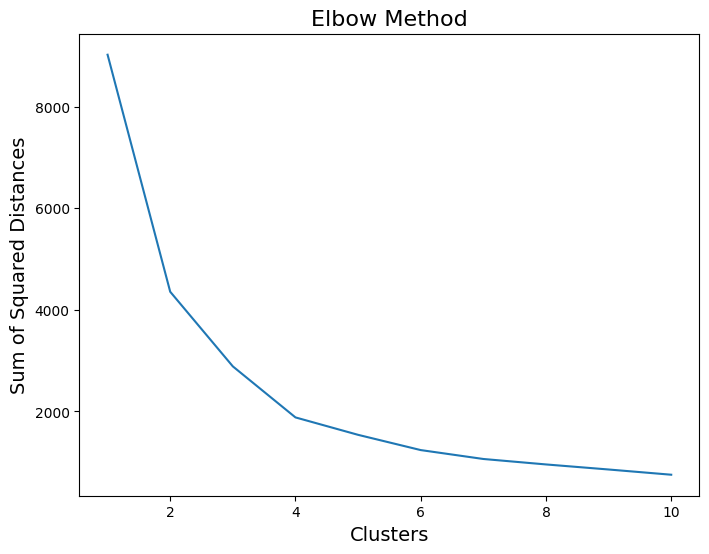

In [34]:
# Use the Elbow method to define the optimal number of clusters for kmeans clustering
# Specifies the maximum number of iterations for each run of KMeans to ensure it has enough iterations to converge.
max_iter = 1000
sumsquares = []
# Define the range of clusters to test
number_clusters = range(1,11)
# Loop through the number of clusters and find the inertia
for i in number_clusters:
    kmeans = KMeans(n_clusters = i, max_iter = max_iter, n_init = 'auto')
    kmeans.fit(datasvd)
    sumsquares.append(kmeans.inertia_)
plt.figure(figsize = (8,6))
plt.plot(number_clusters, sumsquares)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('Sum of Squared Distances', fontsize = 14)
plt.title('Elbow Method', fontsize = 16)
plt.show()

In [35]:
# Define the number of clusters = 6
n_clusters = 6
# Fit the kmeans model
clf = KMeans(n_clusters = n_clusters,init = 'random', max_iter = max_iter, tol = 0.0001, algorithm = 'lloyd', n_init = 'auto', random_state = 42)
# Fit and predict the data
fittedkmeans = clf.fit_predict(datasvd)
centroids = clf.cluster_centers_

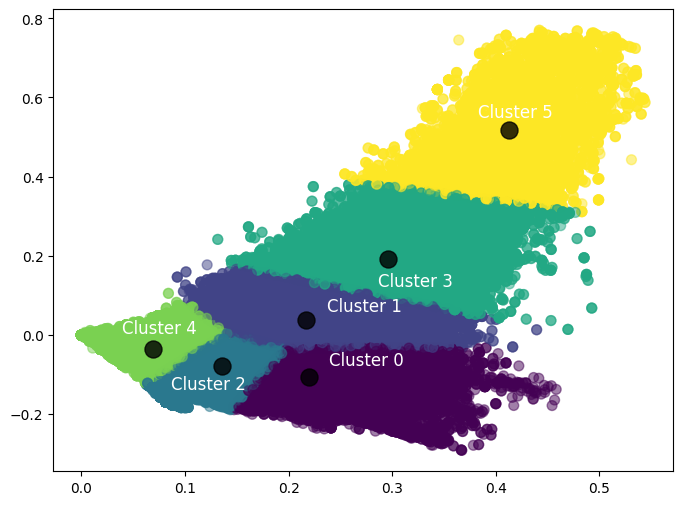

In [36]:
# A diagram showing the clusters
plt.figure(figsize = (8,6))
plt.scatter(datasvd[:,0], datasvd[:,1], c = fittedkmeans, s = 50, cmap = 'viridis', alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s = 150, c = 'black', alpha = 0.8)
plt.annotate('Cluster 0', xy = (centroids[0][0], centroids[0][1]), xytext = (centroids[0][0] + 0.02, centroids[0][1] + 0.03), color = 'white', fontsize = 12)
plt.annotate('Cluster 1', xy = (centroids[1][0], centroids[1][1]), xytext = (centroids[1][0] + 0.02, centroids[1][1] + 0.02), color = 'white', fontsize = 12)
plt.annotate('Cluster 2', xy = (centroids[2][0], centroids[2][1]), xytext = (centroids[2][0] - 0.05, centroids[2][1] - 0.06), color = 'white', fontsize = 12)
plt.annotate('Cluster 3', xy = (centroids[3][0], centroids[3][1]), xytext = (centroids[3][0] - 0.01, centroids[3][1] - 0.07), color = 'white', fontsize = 12)
plt.annotate('Cluster 4', xy = (centroids[4][0], centroids[4][1]), xytext = (centroids[4][0] - 0.03, centroids[4][1] + 0.04), color = 'white', fontsize = 12)
plt.annotate('Cluster 5', xy = (centroids[5][0], centroids[5][1]), xytext = (centroids[5][0] - 0.03, centroids[5][1] + 0.03), color = 'white', fontsize = 12)

plt.show()

In [37]:
# extract top words in every cluster using the inverse_transform method
original_space_centroids = svd.inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1] #(10,5000)
terms = vectorizer.get_feature_names_out()

for i in range(n_clusters):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :20]:
        print(f"{terms[ind]} ", end="")
        
    print()

Cluster 0: please message enron http would subject sent thanks know original pm attached may time call get let need new energy 
Cluster 1: ect enron pm cc subject forwarded development enronxgate please thanks mark ee communication deal john vince know david would kay 
Cluster 2: ect enron cc pm subject development forwarded enronxgate ee communication mark david tana vince john deal sara kay thanks mary 
Cluster 3: enron please message subject would http thanks pm sent know original attached time may let call cc get need new 
Cluster 4: ect enron subject pm please cc thanks would message know forwarded sent attached development deal let need call mark meeting 
Cluster 5: enron please message subject would http thanks pm sent know original attached may time let call get need cc new 


### Anomaly Detection

In [38]:
from sklearn.metrics import pairwise_distances_argmin_min

# Calculate the distance of each point to its assigned cluster centroid
distances = pairwise_distances_argmin_min(datasvd, centroids)[1]

# Determine the threshold for anomalies
threshold = distances.mean() + 2 * distances.std()

# Identify anomalies
anomalies = df[distances > threshold]

# Print the anomalies
print(anomalies)

                             Date                     From  \
19      2000-09-26 12:07:00+00:00  phillip.allen@enron.com   
49      2000-09-06 11:46:00+00:00  phillip.allen@enron.com   
68      2000-08-28 13:40:00+00:00  phillip.allen@enron.com   
86      2000-12-13 13:40:00+00:00   paul.kaufman@enron.com   
89      2000-08-16 10:59:00+00:00  phillip.allen@enron.com   
...                           ...                      ...   
494730  2001-09-26 13:16:58+00:00    andy.zipper@enron.com   
494905  2000-12-11 14:15:00+00:00   david.fisher@enron.com   
495221  2001-11-13 20:16:52+00:00  john.zufferli@enron.com   
495348  2001-08-21 22:32:58+00:00  john.zufferli@enron.com   
495520  2001-12-21 20:44:08+00:00  john.zufferli@enron.com   

                                                       To  \
19                                   ina.rangel@enron.com   
49      thomas.martin@enron.com, mike.grigsby@enron.co...   
68      matthew.lenhart@enron.com, mike.grigsby@enron....   
86         

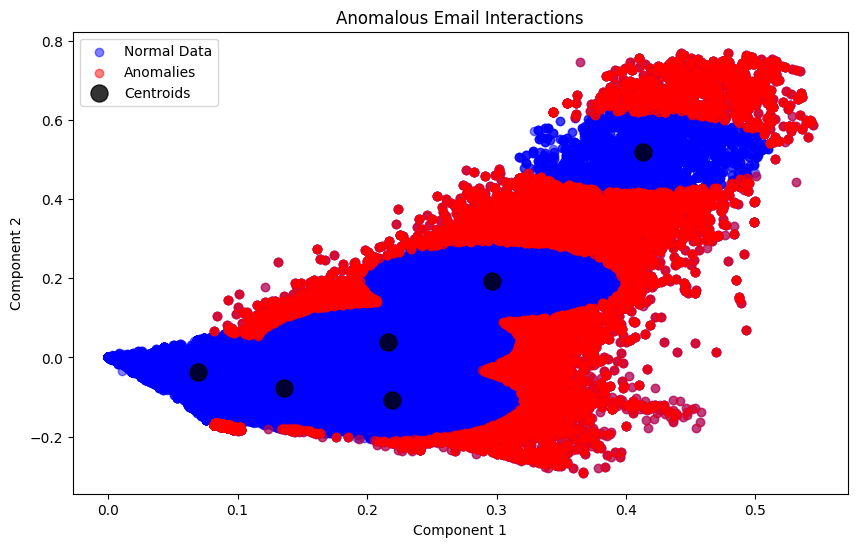

In [39]:
# Visualize the anomalies
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(datasvd[:, 0], datasvd[:, 1], c='blue', label='Normal Data', alpha=0.5)
ax.scatter(datasvd[distances > threshold, 0], datasvd[distances > threshold, 1], c='red', label='Anomalies', alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], s=150, c='black', alpha=0.8, label='Centroids')
ax.set_title('Anomalous Email Interactions')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.show()

#### Feature Expansion and Anomaly Detection

In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Sort the DataFrame by sender, receiver, and date
df = df.sort_values(by=['From', 'To', 'Date'])

# Calculate the time interval between consecutive emails from the same sender to the same receiver
df['Time_Diff'] = df.groupby(['From', 'To'])['Date'].diff().dt.total_seconds().fillna(0)

# Calculate the size of the email content
df['Email_Size'] = df['Content'].apply(len)

# Calculate the length of the email subject
df['Subject_Length'] = df['Subject'].apply(len)

# Display the enriched DataFrame
print(df[['From', 'To', 'Date', 'Time_Diff', 'Email_Size', 'Subject_Length']].head())

# Save the enriched DataFrame to a new CSV file
df.to_csv('../enriched_emails.csv', index=False)

                                 From  \
389093  'todd'.delahoussaye@enron.com   
281013  'todd'.delahoussaye@enron.com   
320556  'todd'.delahoussaye@enron.com   
281033  'todd'.delahoussaye@enron.com   
320565  'todd'.delahoussaye@enron.com   

                                                       To  \
389093  derek.bailey@enron.com, jean.bell@enron.com, r...   
281013  derek.bailey@enron.com, jean.bell@enron.com, r...   
320556  derek.bailey@enron.com, jean.bell@enron.com, r...   
281033  derek.bailey@enron.com, jean.bell@enron.com, r...   
320565  derek.bailey@enron.com, jean.bell@enron.com, r...   

                            Date  Time_Diff  Email_Size  Subject_Length  
389093 2001-10-24 13:50:26+00:00        0.0        2739              14  
281013 2001-11-20 16:01:44+00:00        0.0        3554              14  
320556 2001-11-20 16:01:44+00:00        0.0        3554              14  
281033 2001-11-21 16:41:36+00:00    88792.0         829              14  
320565 2001-11-2

In [ ]:

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model to the data
iso_forest.fit(datasvd)

# Predict anomalies
df['Anomaly'] = iso_forest.predict(datasvd)

# Convert the anomaly labels to boolean (1 for anomaly, -1 for normal)
df['Anomaly'] = df['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Display the anomalies
anomalies = df[df['Anomaly'] == 1]
print(anomalies)

# Save the anomalies to a new CSV file
anomalies.to_csv('../anomalies_isolation_forest.csv', index=False)

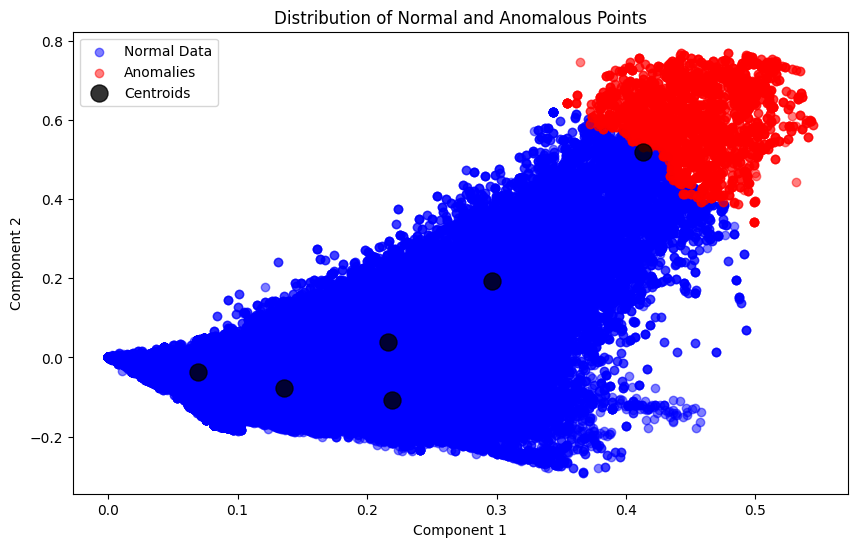

In [41]:
# Visualize the distribution of normal and abnormal points
fig, ax = plt.subplots(figsize=(10, 6))

# Plot normal points
normal_points = datasvd[df['Anomaly'] == 0]
ax.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', label='Normal Data', alpha=0.5)

# Plot abnormal points
anomalous_points = datasvd[df['Anomaly'] == 1]
ax.scatter(anomalous_points[:, 0], anomalous_points[:, 1], c='red', label='Anomalies', alpha=0.5)

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], s=150, c='black', alpha=0.8, label='Centroids')

# Set plot title and labels
ax.set_title('Distribution of Normal and Anomalous Points')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()

# Show plot
plt.show()